# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=45719f06a9a5868fc21a2b7825155b58&units=imperial&q='

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url+city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]['temp_max']
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]['all']
        city_wind = city_weather["wind"]['speed']
        city_country = city_weather["sys"]["country"]
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kuyanovo
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | saldanha
Processing Record 5 of Set 1 | airai
Processing Record 6 of Set 1 | bambous virieux
Processing Record 7 of Set 1 | mount gambier
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | bara
Processing Record 11 of Set 1 | saint george
Processing Record 12 of Set 1 | bartica
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | kruisfontein
Processing Record 15 of Set 1 | abonnema
Processing Record 16 of Set 1 | severo-kurilsk
Processing Record 17 of Set 1 | khani
Processing Record 18 of Set 1 | usinsk
Processing Record 19 of Set 1 | ceres
Processing Record 20 of Set 1 | victoria
Processing Record 21 of Set 1 | dryden
Processing Record 22 of Set 1 | longyearbyen
Processing Record 23 of Set

Processing Record 35 of Set 4 | rockingham
Processing Record 36 of Set 4 | shiyan
Processing Record 37 of Set 4 | puerto ayora
Processing Record 38 of Set 4 | grand centre
City not found. Skipping...
Processing Record 39 of Set 4 | alofi
Processing Record 40 of Set 4 | naze
Processing Record 41 of Set 4 | dunedin
Processing Record 42 of Set 4 | qaanaaq
Processing Record 43 of Set 4 | namibe
Processing Record 44 of Set 4 | samarai
Processing Record 45 of Set 4 | phnum penh
City not found. Skipping...
Processing Record 46 of Set 4 | gap
Processing Record 47 of Set 4 | margate
Processing Record 48 of Set 4 | teguldet
Processing Record 49 of Set 4 | broome
Processing Record 0 of Set 5 | zyryanka
Processing Record 1 of Set 5 | aykhal
Processing Record 2 of Set 5 | tateyama
Processing Record 3 of Set 5 | camocim
Processing Record 4 of Set 5 | bonthe
Processing Record 5 of Set 5 | bethel
Processing Record 6 of Set 5 | abashiri
Processing Record 7 of Set 5 | rungata
City not found. Skipping...

Processing Record 26 of Set 8 | gamba
Processing Record 27 of Set 8 | saint-louis
Processing Record 28 of Set 8 | smithers
Processing Record 29 of Set 8 | axim
Processing Record 30 of Set 8 | cedar city
Processing Record 31 of Set 8 | doka
Processing Record 32 of Set 8 | kanniyakumari
Processing Record 33 of Set 8 | merauke
Processing Record 34 of Set 8 | mengcheng
Processing Record 35 of Set 8 | nuqui
Processing Record 36 of Set 8 | tigre
Processing Record 37 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 38 of Set 8 | magistralnyy
Processing Record 39 of Set 8 | hay river
Processing Record 40 of Set 8 | acapulco
Processing Record 41 of Set 8 | khagrachari
City not found. Skipping...
Processing Record 42 of Set 8 | muroto
Processing Record 43 of Set 8 | ankara
Processing Record 44 of Set 8 | natchitoches
Processing Record 45 of Set 8 | karasjok
Processing Record 46 of Set 8 | palana
Processing Record 47 of Set 8 | bud
Processing Record 48 of Set 8 | rock sound


Processing Record 16 of Set 12 | takapau
Processing Record 17 of Set 12 | carmo do rio claro
Processing Record 18 of Set 12 | hendijan
City not found. Skipping...
Processing Record 19 of Set 12 | zirgan
Processing Record 20 of Set 12 | strabychovo
Processing Record 21 of Set 12 | hit
Processing Record 22 of Set 12 | changji
Processing Record 23 of Set 12 | umm lajj
Processing Record 24 of Set 12 | jingdezhen
Processing Record 25 of Set 12 | morondava
Processing Record 26 of Set 12 | chifeng
Processing Record 27 of Set 12 | okato
Processing Record 28 of Set 12 | mocuba
Processing Record 29 of Set 12 | bubaque
Processing Record 30 of Set 12 | bandar-e anzali
Processing Record 31 of Set 12 | vanavara
Processing Record 32 of Set 12 | senanga
Processing Record 33 of Set 12 | kavaratti
Processing Record 34 of Set 12 | taoru
Processing Record 35 of Set 12 | saint-augustin
Processing Record 36 of Set 12 | tolaga bay
Processing Record 37 of Set 12 | santarem
Processing Record 38 of Set 12 | san

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kuyanovo,55.8014,54.5372,37.09,98,100,18.79,RU,1678651635
1,punta arenas,-53.1500,-70.9167,59.11,47,75,28.77,CL,1678651635
2,arraial do cabo,-22.9661,-42.0278,78.66,83,75,9.22,BR,1678651635
3,saldanha,-33.0117,17.9442,63.97,84,0,14.67,ZA,1678651636
4,airai,-8.9266,125.4092,57.87,93,23,1.12,TL,1678651601


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("visualizations/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("visualizations/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kuyanovo,55.8014,54.5372,37.09,98,100,18.79,RU,1678651635
1,punta arenas,-53.1500,-70.9167,59.11,47,75,28.77,CL,1678651635
2,arraial do cabo,-22.9661,-42.0278,78.66,83,75,9.22,BR,1678651635
3,saldanha,-33.0117,17.9442,63.97,84,0,14.67,ZA,1678651636
4,airai,-8.9266,125.4092,57.87,93,23,1.12,TL,1678651601


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

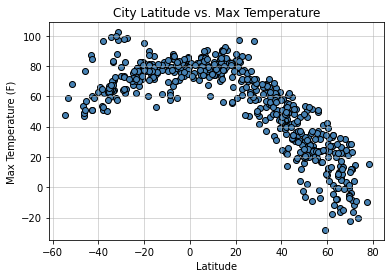

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("visualizations/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

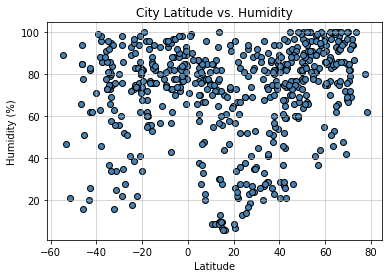

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("visualizations/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

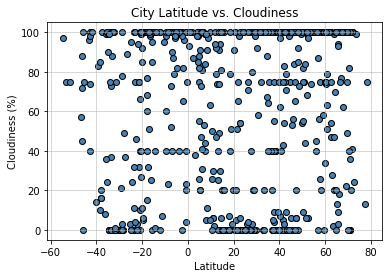

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("visualizations/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

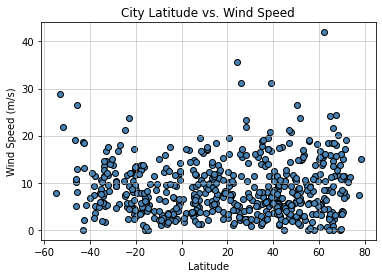

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("visualizations/Fig4.png")


# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values,x_label, y_label,eqn_placement):
## Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
    regress_values = x_values * slope + intercept
# Create line equation string    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
    plt.scatter(x_values,y_values)
# Plot regression line
    plt.plot(x_values,regress_values,"r-")
# Label plot and annotate the line equation
    plt.annotate(line_eq,eqn_placement,fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
# Print r value
    print(f"The r-squared value is: {rvalue**2}")


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kuyanovo,55.8014,54.5372,37.09,98,100,18.79,RU,1678651635
9,bara,10.3744,10.7288,82.56,9,50,7.78,NG,1678651509
10,saint george,37.1041,-113.5841,63.43,51,0,4.00,US,1678651538
11,bartica,6.4000,-58.6167,86.32,67,100,3.60,GY,1678651637
12,albany,42.6001,-73.9662,45.05,45,100,1.01,US,1678651517


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,punta arenas,-53.1500,-70.9167,59.11,47,75,28.77,CL,1678651635
2,arraial do cabo,-22.9661,-42.0278,78.66,83,75,9.22,BR,1678651635
3,saldanha,-33.0117,17.9442,63.97,84,0,14.67,ZA,1678651636
4,airai,-8.9266,125.4092,57.87,93,23,1.12,TL,1678651601
5,bambous virieux,-20.3428,57.7575,78.22,80,99,13.06,MU,1678651636


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.8031290044127877


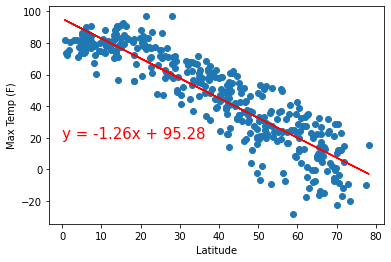

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
linear_regression(x_values, y_values, "Latitude", "Max Temp (F)",(0,20))

The r-squared value is: 0.21415795877158406


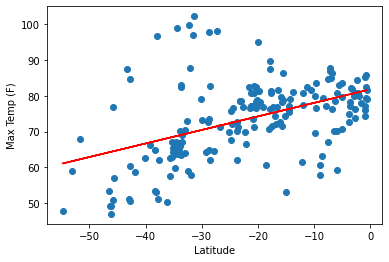

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
linear_regression(x_values, y_values, "Latitude", "Max Temp (F)",(-40,40))

Results discussion  
77.5% variance in maximum temperature in Northern hemisphere can be explained by latitude. This is a moderate negative relationsip. As the latitude increases, the maximum temperature decreases.
In southern hemisphere, there was a weak positive correlation, and change in latitude can explain 31% variance in maximum temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.13123163016155887


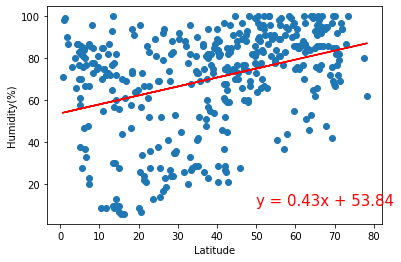

In [18]:
# Northern Hemisphere
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
linear_regression(x_values, y_values, "Latitude", "Humidity(%)",(50,10))

The r-squared value is: 0.0813875901161575


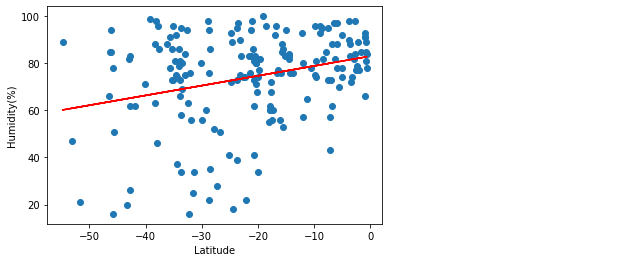

In [24]:
# Southern Hemisphere
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
linear_regression(x_values, y_values, "Latitude", "Humidity(%)",(-58,30))

**Discussion about the linear relationship:** Weak positive relationship between latitude and humdidity in Northern as well as Southern Hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.017392227010723883


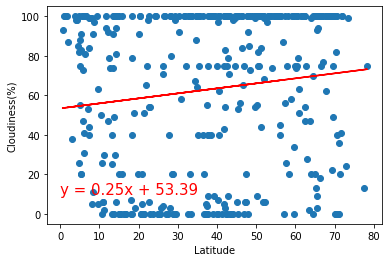

In [25]:
# Northern Hemisphere
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
linear_regression(x_values, y_values, "Latitude", "Cloudiness(%)",(0,10))

The r-squared value is: 0.055373177568172574


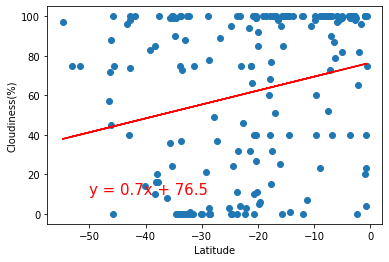

In [27]:
# Southern Hemisphere
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
linear_regression(x_values, y_values, "Latitude", "Cloudiness(%)",(-50,10))

**Discussion about the linear relationship:** Weak positive relationship between latitude and cloudiness in Northern as well as Southern Hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.0037235609250917657


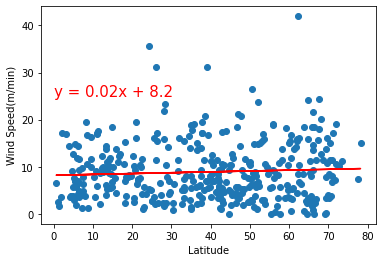

In [28]:
# Northern Hemisphere
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
linear_regression(x_values, y_values, "Latitude", "Wind Speed(m/min)",(0,25))

The r-squared value is: 0.10802563843750924


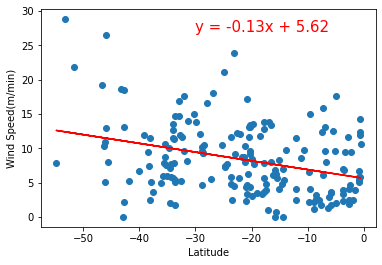

In [30]:
# Southern Hemisphere
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
linear_regression(x_values, y_values, "Latitude", "Wind Speed(m/min)",(-30,27))

**Discussion about the linear relationship:** Weak relationship between latitude and wind speed in Northern as well as Southern Hemisphere